In [ ]:
from google.colab import drive
import os
  
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
#plt.rc('font', family='NanumBarunGothic') 

## 데이터 불러오기

In [ ]:
# 정규화한 1인당 자가용 수
car = pd.read_excel('/content/drive/MyDrive/데이터청년캠퍼스/회귀 군집화/1인당 자가용 수.xlsx')
car.columns = ['지역', '1인당 자가용 수', '정규화한 자가용 수']
car_normal = car[['지역', '정규화한 자가용 수']]
car_normal

,지역,정규화한 자가용 수
0,종로구,0.332210
1,중구,0.663813
2,용산구,0.514421
3,성동구,0.512009
4,광진구,0.200732
5,동대문구,0.211683
6,중랑구,0.217438
7,성북구,0.190091
8,강북구,0.031251
9,도봉구,0.265857


In [ ]:
# 정규화한 대졸이상비율
study = pd.read_excel('/content/drive/MyDrive/회귀 군집화/대졸이상비율.xlsx')
study.columns = ['지역', '대졸이상비율', '정규화한 대졸비율']
study_normal = study[['지역', '정규화한 대졸비율']]
study_normal

,지역,정규화한 대졸비율
0,종로구,0.412207
1,중구,0.348976
2,용산구,0.592173
3,성동구,0.525092
4,광진구,0.465607
5,동대문구,0.206691
6,중랑구,0.064550
7,성북구,0.314836
8,강북구,0.000000
9,도봉구,0.204356


In [ ]:
# 정규화한 만명당 공무원 수
servant = pd.read_excel('/content/drive/MyDrive/회귀 군집화/만명당 공무원수.xlsx')
servant_normal = servant[['지역', '정규화한 만명당 공무원수']]
servant_normal

,지역,정규화한 만명당 공무원수
0,종로구,0.709741
1,중구,1.000000
2,용산구,0.528559
3,성동구,0.221427
4,광진구,0.137802
5,동대문구,0.112036
6,중랑구,0.169051
7,성북구,0.119584
8,강북구,0.226872
9,도봉구,0.147048


In [ ]:
# 정규화한 만명당 재정수입
civil_money = pd.read_excel('/content/drive/MyDrive/회귀 군집화/만명당 재정수입.xlsx')
civil_money_normal = civil_money[['지역', '정규화한 만명당 재정수입']]
civil_money_normal

,지역,정규화한 만명당 재정수입
0,종로구,0.705350
1,중구,1.000000
2,용산구,0.358512
3,성동구,0.224507
4,광진구,0.161078
5,동대문구,0.242685
6,중랑구,0.309437
7,성북구,0.235462
8,강북구,0.417865
9,도봉구,0.347204


In [ ]:
# 정규화한 면적
ground = pd.read_excel('/content/drive/MyDrive/회귀 군집화/면적.xlsx')
ground_normal = ground[['자치구', '면적_scaled']]
ground_normal.columns = ['지역', '정규화한 면적']
ground_normal

,지역,정규화한 면적
0,종로구,0.376823
1,중구,0.000000
2,용산구,0.321718
3,성동구,0.186386
4,광진구,0.191788
5,동대문구,0.115073
6,중랑구,0.230686
7,성북구,0.394922
8,강북구,0.368449
9,도봉구,0.288763


In [ ]:
# 정규화한 수급인구비율
protect_real = pd.read_excel('/content/drive/MyDrive/회귀 군집화/생활보호자 비율.xlsx')

protect_normal = pd.DataFrame(columns = ['지역', '수급인구비율', '정규화한 수급인구비율'])
protect_normal['지역'] = protect_real['Unnamed: 1']
protect_normal['수급인구비율'] = protect_real['수급 인구 비율']
protect_normal['정규화한 수급인구비율'] = protect_real['수급 인구 비율'].copy()
protect_normal = protect_normal.drop(0, axis = 0).reset_index(drop = True)
for i in range(len(protect_normal)):
  protect_normal['정규화한 수급인구비율'][i] = (protect_normal['수급인구비율'][i] - min(protect_normal['수급인구비율']))/(max(protect_normal['수급인구비율'])-min(protect_normal['수급인구비율']))

protect_normal = protect_normal.drop(['수급인구비율'], axis = 1)
protect_normal

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,지역,정규화한 수급인구비율
0,종로구,0.356764
1,중구,0.491546
2,용산구,0.375088
3,성동구,0.344906
4,광진구,0.357580
5,동대문구,0.549567
6,중랑구,0.967694
7,성북구,0.399893
8,강북구,1.000000
9,도봉구,0.554828


In [ ]:
# 정규화한 인구수
people = pd.read_excel('/content/drive/MyDrive/회귀 군집화/인구수.xlsx')
people_normal = people[['지역', '정규화한 인구수']]
people_normal

,지역,정규화한 인구수
0,종로구,0.047220
1,중구,0.000000
2,용산구,0.180200
3,성동구,0.362897
4,광진구,0.433783
5,동대문구,0.431415
6,중랑구,0.486004
7,성북구,0.584702
8,강북구,0.329079
9,도봉구,0.367409


In [ ]:
# 정규화한 재산세
people_money = pd.read_excel('/content/drive/MyDrive/회귀 군집화/재산세.xlsx')
people_money_normal = people_money[['자치구', '1인당 재산세(단위:원)_scaled']]
people_money_normal.columns = ['지역', '정규화한 재산세']
people_money_normal

,지역,정규화한 재산세
0,종로구,0.621642
1,중구,1.000000
2,용산구,0.433567
3,성동구,0.206046
4,광진구,0.109239
5,동대문구,0.099887
6,중랑구,0.037164
7,성북구,0.043108
8,강북구,0.084404
9,도봉구,0.071293


In [ ]:
# 정규화한 사업체 수
company = pd.read_excel('/content/drive/MyDrive/회귀 군집화/총사업체수.xlsx')
company_normal = company[['자치구', '사업체수_scaled']]
company_normal.columns = ['지역', '정규화한 총사업체수']
company_normal

,지역,정규화한 총사업체수
0,종로구,0.278645
1,중구,0.564826
2,용산구,0.065961
3,성동구,0.178597
4,광진구,0.109741
5,동대문구,0.194775
6,중랑구,0.144790
7,성북구,0.098528
8,강북구,0.012343
9,도봉구,0.000000


In [ ]:
# 정규화한 투표율
vote = pd.read_excel('/content/drive/MyDrive/회귀 군집화/투표율.xlsx')
vote_normal = vote[['지역', '정규화한 투표율']]
vote_normal

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,지역,정규화한 투표율
0,종로구,1.000000
1,중구,0.555556
2,용산구,0.333333
3,성동구,0.555556
4,광진구,0.777778
5,동대문구,0.333333
6,중랑구,0.111111
7,성북구,0.555556
8,강북구,0.000000
9,도봉구,0.333333


In [ ]:
# 정규화한 행정동 수
dong = pd.read_excel('/content/drive/MyDrive/회귀 군집화/행정동 수 (1).xlsx')
dong_normal = dong[['지역', '정규화한 행정동 수']]
dong_normal

,지역,정규화한 행정동 수
0,강남구,0.705882
1,강동구,0.529412
2,강북구,0.176471
3,강서구,0.588235
4,관악구,0.647059
5,광진구,0.294118
6,구로구,0.352941
7,금천구,0.000000
8,노원구,0.529412
9,도봉구,0.235294


In [ ]:
# 모든 데이터 합친 후 다듬기
data_normal = pd.concat([car_normal, study_normal, servant_normal, civil_money_normal, ground_normal, protect_normal, people_normal, people_money_normal, company_normal, vote_normal, dong_normal], axis = 1)
data_normal = data_normal.drop(['지역'], axis = 1)
data_normal['지역'] = people_normal['지역']

data_normal

,정규화한 자가용 수,정규화한 대졸비율,정규화한 만명당 공무원수,정규화한 만명당 재정수입,정규화한 면적,정규화한 수급인구비율,정규화한 인구수,정규화한 재산세,정규화한 총사업체수,정규화한 투표율,정규화한 행정동 수,지역
0,0.332210,0.412207,0.709741,0.705350,0.376823,0.356764,0.047220,0.621642,0.278645,1.000000,0.705882,종로구
1,0.663813,0.348976,1.000000,1.000000,0.000000,0.491546,0.000000,1.000000,0.564826,0.555556,0.529412,중구
2,0.514421,0.592173,0.528559,0.358512,0.321718,0.375088,0.180200,0.433567,0.065961,0.333333,0.176471,용산구
3,0.512009,0.525092,0.221427,0.224507,0.186386,0.344906,0.362897,0.206046,0.178597,0.555556,0.588235,성동구
4,0.200732,0.465607,0.137802,0.161078,0.191788,0.357580,0.433783,0.109239,0.109741,0.777778,0.647059,광진구
5,0.211683,0.206691,0.112036,0.242685,0.115073,0.549567,0.431415,0.099887,0.194775,0.333333,0.294118,동대문구
6,0.217438,0.064550,0.169051,0.309437,0.230686,0.967694,0.486004,0.037164,0.144790,0.111111,0.352941,중랑구
7,0.190091,0.314836,0.119584,0.235462,0.394922,0.399893,0.584702,0.043108,0.098528,0.555556,0.000000,성북구
8,0.031251,0.000000,0.226872,0.417865,0.368449,1.000000,0.329079,0.084404,0.012343,0.000000,0.529412,강북구
9,0.265857,0.204356,0.147048,0.347204,0.288763,0.554828,0.367409,0.071293,0.000000,0.333333,0.235294,도봉구


In [ ]:
# data_normal.to_excel('정규화한 데이터.xlsx')

## 회귀분석

In [ ]:
#data_normal = pd.read_excel('/content/drive/MyDrive/데이터청년캠퍼스/회귀 군집화/정규화한 데이터.xlsx')
#data_normal = data_normal.drop(['Unnamed: 0'], axis = 1)

In [ ]:
# 공공체육시설 수 데이터 가져온 후 정규화
gym = pd.read_excel('/content/drive/MyDrive/데이터청년캠퍼스/회귀 군집화/공공체육시설 수.xlsx')

gym['공체시설수'] = gym['공체시설수'].astype(float)

gym['정규화한 공체시설수'] = gym['공체시설수'].copy()

for i in range(len(gym)):
  gym['정규화한 공체시설수'][i] = float((gym['공체시설수'][i]-min(gym['공체시설수']))/(max(gym['공체시설수'])-min(gym['공체시설수'])))

gym_normal = gym[['지역', '정규화한 공체시설수']]
gym_raw = gym[['지역', '공체시설수']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# 변수들에 대해서만 회귀분석을 진행하기 위해 자치구명 제거
list = data_normal.columns
X_normal = data_normal[list[:-1]]
X_normal

,정규화한 자가용 수,정규화한 대졸비율,정규화한 만명당 공무원수,정규화한 만명당 재정수입,정규화한 면적,정규화한 수급인구비율,정규화한 인구수,정규화한 재산세,정규화한 총사업체수,정규화한 투표율,정규화한 행정동 수
0,0.332210,0.412207,0.709741,0.705350,0.376823,0.356764,0.047220,0.621642,0.278645,1.000000,0.705882
1,0.663813,0.348976,1.000000,1.000000,0.000000,0.491546,0.000000,1.000000,0.564826,0.555556,0.529412
2,0.514421,0.592173,0.528559,0.358512,0.321718,0.375088,0.180200,0.433567,0.065961,0.333333,0.176471
3,0.512009,0.525092,0.221427,0.224507,0.186386,0.344906,0.362897,0.206046,0.178597,0.555556,0.588235
4,0.200732,0.465607,0.137802,0.161078,0.191788,0.357580,0.433783,0.109239,0.109741,0.777778,0.647059
5,0.211683,0.206691,0.112036,0.242685,0.115073,0.549567,0.431415,0.099887,0.194775,0.333333,0.294118
6,0.217438,0.064550,0.169051,0.309437,0.230686,0.967694,0.486004,0.037164,0.144790,0.111111,0.352941
7,0.190091,0.314836,0.119584,0.235462,0.394922,0.399893,0.584702,0.043108,0.098528,0.555556,0.000000
8,0.031251,0.000000,0.226872,0.417865,0.368449,1.000000,0.329079,0.084404,0.012343,0.000000,0.529412
9,0.265857,0.204356,0.147048,0.347204,0.288763,0.554828,0.367409,0.071293,0.000000,0.333333,0.235294


In [ ]:
y_normal = gym_normal[['정규화한 공체시설수']]
y_normal

,정규화한 공체시설수
0,0.200000
1,0.700000
2,0.266667
3,0.100000
4,0.200000
5,0.100000
6,0.166667
7,0.266667
8,0.000000
9,0.066667


#### 정규화한 값에 대하여 진행

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


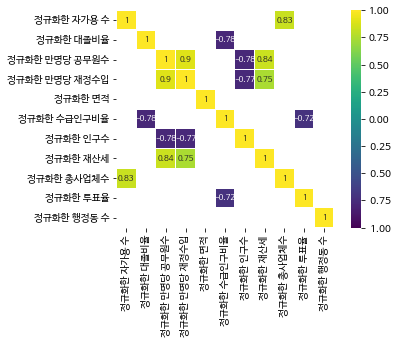

In [ ]:
# 독립변수들 간의 다중공선성 확인을 위한 heatmap그리기. 상관계수의 크기가 0.7 이상인 것만 그려 상관성을 가지는 변수들 한 눈에 확인 가능
import matplotlib.pyplot as plt
corr = X_normal.corr()
sns.heatmap(corr[(corr >= 0.7) | (corr <= -0.7)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

자가용 수, 대졸비율, 공무원 수, 재정수입 제거

In [ ]:
# 제거되지 않은 변수들만을 이용해 데이터셋 생성, 회귀분석 진행
X_data = X_normal[['정규화한 면적',
       '정규화한 수급인구비율', '정규화한 인구수', '정규화한 재산세', '정규화한 총사업체수', '정규화한 투표율',
       '정규화한 행정동 수']]
       
X_data

,정규화한 면적,정규화한 수급인구비율,정규화한 인구수,정규화한 재산세,정규화한 총사업체수,정규화한 투표율,정규화한 행정동 수
0,0.376823,0.356764,0.047220,0.621642,0.278645,1.000000,0.705882
1,0.000000,0.491546,0.000000,1.000000,0.564826,0.555556,0.529412
2,0.321718,0.375088,0.180200,0.433567,0.065961,0.333333,0.176471
3,0.186386,0.344906,0.362897,0.206046,0.178597,0.555556,0.588235
4,0.191788,0.357580,0.433783,0.109239,0.109741,0.777778,0.647059
5,0.115073,0.549567,0.431415,0.099887,0.194775,0.333333,0.294118
6,0.230686,0.967694,0.486004,0.037164,0.144790,0.111111,0.352941
7,0.394922,0.399893,0.584702,0.043108,0.098528,0.555556,0.000000
8,0.368449,1.000000,0.329079,0.084404,0.012343,0.000000,0.529412
9,0.288763,0.554828,0.367409,0.071293,0.000000,0.333333,0.235294


In [ ]:
## 후진 소거법 ##
variables = X_data.columns.tolist() # 설명 변수 리스트
 
selected_variables = variables # 초기에는 모든 변수가 선택된 상태
sl_remove = 0.05 # 유의성을 위한 p-value값
 
sv_per_step = [] # 각 스텝별로 선택된 변수들
adjusted_r_squared = [] # 각 스텝별 수정된 결정계수
steps = [] # 스텝
step = 0
while len(selected_variables) > 0:
    X = sm.add_constant(X_data[selected_variables])
    p_vals = sm.OLS(y_normal,X).fit().pvalues[1:] # 회귀분석 각 변수의 p-value 값. 절편항의 p-value는 뺀다
    max_pval = p_vals.max() # 최대 p-value
    if max_pval >= sl_remove: # 최대 p-value값이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        selected_variables.remove(remove_variable)
 
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y_normal,sm.add_constant(X_data[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future versi

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44508 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_

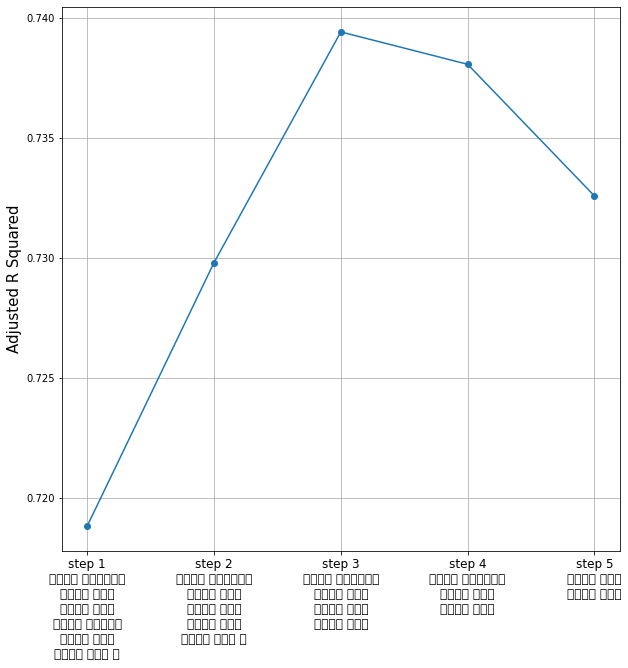

In [ ]:
## 각 step별 선택된 변수와 adjusted R-squared를 plotting
fig = plt.figure(figsize = (10, 10))
fig.set_facecolor('white')

font_size = 15
plt.xticks(steps, [f'step {s}\n'+'\n'.join(sv_per_step[i]) for i, s in enumerate(steps)], fontsize = 12)
plt.plot(steps, adjusted_r_squared, marker = 'o')

plt.ylabel("Adjusted R Squared", fontsize = font_size)
plt.grid(True)
plt.show()

In [ ]:
p_vals # 각 변수의 p-value 확인

정규화한 인구수    3.583391e-06
정규화한 재산세    6.044005e-08
dtype: float64

In [ ]:
## 선택된 세가지 변수에 대해서 회귀분석 진행 
X = X_data[['정규화한 인구수', '정규화한 재산세', '정규화한 수급인구비율']]

p_vals = sm.OLS(y_normal,X).fit().pvalues[0:]
adj_r_squared = sm.OLS(y_normal,sm.add_constant(X)).fit().rsquared_adj

print(p_vals, '\n','Adjusted R-squared : ' + str(adj_r_squared))

정규화한 인구수       2.634435e-07
정규화한 재산세       3.929693e-08
정규화한 수급인구비율    4.042405e-03
dtype: float64 
 Adjusted R-squared : 0.7380603026448311


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
